## My TF - Classification Example
+ Vamos usar TF.Estimator
+ Vai tratar de dados categoricos

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## DataSet Diabetes

Temos que prever a features `Class`

768 linhas

1. Number_pregnant
2. Glucose_concentration
3. Blood_pressure
4. Triceps
5. Insulin
6. BMI
7. Pedigree
8. Age
9. Class
10. Group

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


## Limpar Dados  : Normalizálos


In [5]:
# Exemplo de Limpeza de Dados com PANDAS
colunas_para_normalizar = ['Number_pregnant', 'Glucose_concentration', 
                           'Blood_pressure', 'Triceps', 'Insulin',
                           'BMI', 'Pedigree']

In [6]:
diabetes[colunas_para_normalizar] = diabetes[colunas_para_normalizar].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


## Criando Fetures Columsn no TF.Estimator

In [8]:
# Variaveis numericas
num_preg    = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press  = tf.feature_column.numeric_column('Blood_pressure')
tricep      = tf.feature_column.numeric_column('Triceps')
insulin     = tf.feature_column.numeric_column('Insulin')
bmi         = tf.feature_column.numeric_column('BMI')
age         = tf.feature_column.numeric_column('Age')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')

In [9]:
# Opções
# categorical_column_with_hash_bucket
# categorical_column_with_identity
# categorical_column_with_vocabulary_file
# categorical_column_with_vocabulary_list <--

# craidno a features categorica
# Aqui colcamos as opçoes do grupo
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

# Mas, quando nao sabemos usadmos hash_bucket
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10

## Tratando Idade para mapear num intervalo
Convertendo para intervalos quase que categoricos

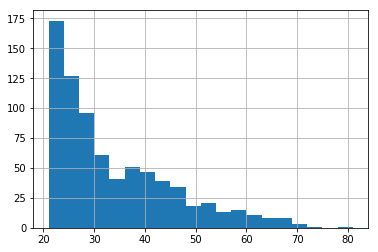

In [10]:
diabetes['Age'].hist(bins=20)

In [11]:
# vai criar uma coluna em que, de acordo com o valor, vai mapear para
# [20,30,40,50,60,70,80]
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

**Juntando tudo**

In [12]:
# Aqui teremos as colunas das features, usadaas para encontrar o target
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,
             insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

## Agora que está formatado, vamos separar

In [13]:
x_data = diabetes.drop('Class', axis=1) # Array de Input: Features
labels = diabetes['Class']             # Output : Target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    labels,
                                                    test_size=0.33,
                                                    random_state=101)

## Aula Parte 2

In [15]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y =  y_train, batch_size = 10, num_epochs = 1000, shuffle=True)

In [16]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Rafael\\AppData\\Local\\Temp\\tmptsryy9i1', '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [17]:
# treinando o modelo
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rafael\AppData\Local\Temp\tmptsryy9i1\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 218.967
INFO:tensorflow:step = 101, loss = 6.62403 (0.464 sec)
INFO:tensorflow:global_step/sec: 232.946
INFO:tensorflow:step = 201, loss = 8.82182 (0.429 sec)
INFO:tensorflow:global_step/sec: 245.235
INFO:tensorflow:step = 301, loss = 7.96418 (0.405 sec)
INFO:tensorflow:global_step/sec: 252.548
INFO:tensorflow:step = 401, loss = 6.09078 (0.396 sec)
INFO:tensorflow:global_step/sec: 237.936
INFO:tensorflow:step = 501, loss = 6.62066 (0.420 sec)
INFO:tensorflow:global_step/sec: 174.556
INFO:tensorflow:step = 601, loss = 5.11047 (0.585 sec)
INFO:tensorflow:global_step/sec: 209.286
INFO:tensorflow:step = 701, loss = 4.96716 (0.465 sec)
INFO:tensorflow:global_step/sec: 188.199
INFO:tensorflow:step = 801, loss = 4.99251 (0.533 sec)
INFO:tensorflow:global_step/sec: 181.863
I

## Avaliando o Modelo

In [18]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [21]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-17-20:56:39
INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmptsryy9i1\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-17-20:56:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.732283, accuracy_baseline = 0.65748, auc = 0.785085, auc_precision_recall = 0.620927, average_loss = 0.531943, global_step = 1000, label/mean = 0.34252, loss = 5.19668, prediction/mean = 0.360754


{'accuracy': 0.73228347,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78508508,
 'auc_precision_recall': 0.62092668,
 'average_loss': 0.5319432,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.1966758,
 'prediction/mean': 0.36075363}

In [22]:
results
# 74%

{'accuracy': 0.73228347,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78508508,
 'auc_precision_recall': 0.62092668,
 'average_loss': 0.5319432,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.1966758,
 'prediction/mean': 0.36075363}

## Agora, predizer com o nosso modelo

In [23]:
# Vamos passar os dados de Test separados antes
# note que nao tera o y pois você vai predizer
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x = X_test,
      batch_size = 10,
      num_epochs = 1,
      shuffle = False)

In [24]:
predictions = model.predict(pred_input_func)

In [25]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmptsryy9i1\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54995733], dtype=float32),
  'logits': array([ 0.20049822], dtype=float32),
  'probabilities': array([ 0.45004272,  0.54995733], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.61844224], dtype=float32),
  'logits': array([ 0.48294151], dtype=float32),
  'probabilities': array([ 0.38155776,  0.61844224], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.38361868], dtype=float32),
  'logits': array([-0.47421688], dtype=float32),
  'probabilities': array([ 0.61638135,  0.38361865], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31076169], dtype=float32),
  'logits': array([-0.7965607], dtype=float32),
  'probabilities': array([ 0.68923831,  0.31076172], dtype=floa

## Agora Vamos criar uma DenseNeuralNet (DNN) mais potente que a outra

In [26]:
## @hidden_units = numeros de neuronios por camada , ou seja, [10,10,10] sao 3 camadas de 10 neuronios
dnn_model = tf.estimator.DNNClassifier(
    hidden_units = [10,10,10], 
    feature_columns = feat_cols,
    n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Rafael\\AppData\\Local\\Temp\\tmpheifxa2u', '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [27]:
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py
# Vair dar um problema com os dados categoricos, que numa coluna pode ser ABCD, entao n ==> 4
embedded_group_column = tf.feature_column.embedding_column(
    assigned_group,
    dimension = 4)

In [28]:
# Vamos entao criar outro grupo de colunas de featrures com o
# dado categorico convertido
feat_cols = [num_preg ,plasma_gluc,dias_press ,
             tricep ,insulin,bmi,diabetes_pedigree ,
             embedded_group_column, age_buckets]

In [29]:
# Criando funçâo de entrada de dados
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,y=y_train
    ,batch_size=10,num_epochs=1000,
    shuffle=True)

In [30]:
# Criando o modelo de DNN
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10,10,10],
    feature_columns=feat_cols,
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Rafael\\AppData\\Local\\Temp\\tmpbr9yz_bp', '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600}


In [31]:
# Treinando o Modelo
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rafael\AppData\Local\Temp\tmpbr9yz_bp\model.ckpt.
INFO:tensorflow:step = 1, loss = 8.82464
INFO:tensorflow:global_step/sec: 235.189
INFO:tensorflow:step = 101, loss = 4.92949 (0.425 sec)
INFO:tensorflow:global_step/sec: 253.713
INFO:tensorflow:step = 201, loss = 6.99349 (0.394 sec)
INFO:tensorflow:global_step/sec: 265.051
INFO:tensorflow:step = 301, loss = 5.84475 (0.377 sec)
INFO:tensorflow:global_step/sec: 257.219
INFO:tensorflow:step = 401, loss = 6.80579 (0.387 sec)
INFO:tensorflow:global_step/sec: 264
INFO:tensorflow:step = 501, loss = 7.75044 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.311
INFO:tensorflow:step = 601, loss = 2.66143 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.067
INFO:tensorflow:step = 701, loss = 7.95807 (0.388 sec)
INFO:tensorflow:global_step/sec: 260.559
INFO:tensorflow:step = 801, loss = 5.07708 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.789
INFO:

### Avaliando o Modelo

In [32]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [33]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-17-21:08:45
INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmpbr9yz_bp\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-17-21:08:46
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.704724, accuracy_baseline = 0.65748, auc = 0.819774, auc_precision_recall = 0.664351, average_loss = 0.509672, global_step = 1000, label/mean = 0.34252, loss = 4.9791, prediction/mean = 0.403008


{'accuracy': 0.70472443,
 'accuracy_baseline': 0.65748036,
 'auc': 0.81977415,
 'auc_precision_recall': 0.66435111,
 'average_loss': 0.50967199,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.9791031,
 'prediction/mean': 0.40300795}

### Como ocorreu com ele, colocar mais camadas e neuronios nao fez muita diferença